Step 1.
Download the Dataset
Download the dataset from the following link:
https://www.kaggle.com/rtatman/chocolate-bar-ratings
Download the dataset to your local computer in the project directory of your choice.

Step 2.
Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, delete the missing values entries!
Hint: Pandas can do that with one line of code!

In [533]:
import pandas as pd
df=pd.read_csv('flavors_of_cacao.csv').dropna()
#cleaning up the column names
df.columns = ['Company', 'SpecificBeanOrigin',
       'REF', 'ReviewDate', 'CocoaPercent', 'CompanyLocation', 'Rating',
       'BeanType', 'BroadBeanOrigin']

Step 3:
Q: How many tuples are there in the dataset?
A: 1793

In [534]:
df_tuples = len(df)
print(df_tuples)

1793


Step 3 (cont.):
Q: How many unique company names are there in the dataset?
A: 416

In [535]:
company_unique = len(df.Company.unique())
print(company_unique)

416


Step 3 (cont.):
Q: How many reviews are made in 2013 in the dataset?
A: 184

In [536]:
reviewdate_2013 = df.ReviewDate[df.ReviewDate == 2013].count()
print(reviewdate_2013)

184


Step 3 (cont.):
Q: In the BeanType column, how many missing values are there?
A: 887

In [537]:
beantype_missing = df.BeanType[df.BeanType == "\xa0"].count()
print(beantype_missing)

887


Step 4:
Q: Visualize the rating column with a histogram! Comment on the resulting figure!
A: Most of the chocolate bars have a rating between 3 and 4, very few have ratings above 4 and fewer between 1 and 2.

Text(0.5, 0, 'Ratings')

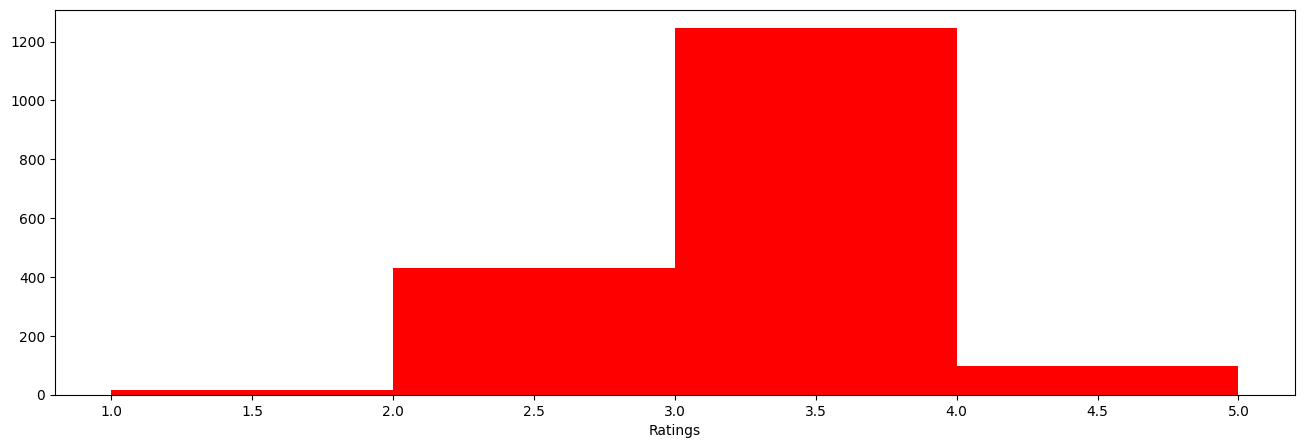

In [538]:
import matplotlib.pyplot as plt
ratings = df.Rating.values
plt.figure(figsize = (16,5))
plt.hist(ratings, bins = 4, color = "red")
plt.xlabel("Ratings")

Step 4 (cont.):
Convert and Visualize
Convert the Column Percent
Change the type of values in the column percent from string values to numerical values.

In [539]:
df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D',"").astype(int)

C:\Users\vvanden\AppData\Local\Temp\ipykernel_11476\649460819.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["CocoaPercent"] = df["CocoaPercent"].str.replace(r'\D',"").astype(int)


Step 5:
Visualize
Plot the converted numerical Cocoa Percent values against the Rating values!
Q: From what you see, does more cocoa in a bar correspond to a higher rating? Hint: Try a scatter plot with small alpha, e.g., 0.1, to flush out the density of each point.
A: There appears to be no distinct relationship between more cocoa in a bar corresponsing to a higer rating.

Text(0.5, 0, 'Cocoa Percent')

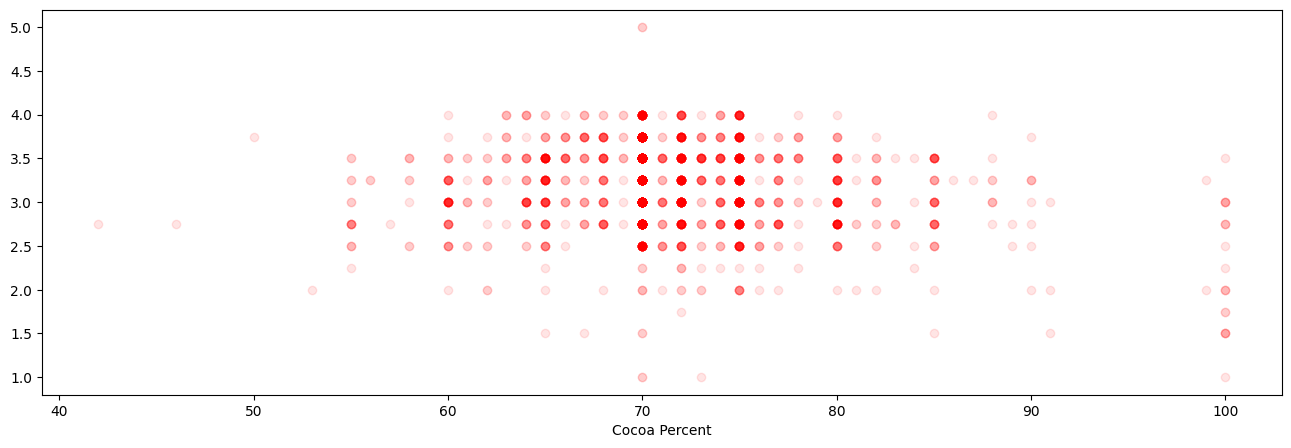

In [540]:
#removing values > than 100% as erroneous values
df.drop(df[df.CocoaPercent > 100].index, inplace = True)
ratings = df.Rating.values
percent = df.CocoaPercent.values
plt.figure(figsize = (16,5))
plt.scatter(percent, ratings, color = "red", alpha = 0.1)
plt.xlabel("Cocoa Percent")

Step 6:
Normalization
Normalize the Ratings Column and print the results.

In [541]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = df.iloc[:, 6:7].values
x_normalized = scaler.fit_transform(x)
print(x_normalized)

[[ 1.17923076]
 [-0.91587607]
 [-0.39209936]
 ...
 [ 0.65545405]
 [ 0.13167735]
 [-0.39209936]]


Step 7:
Challenge Yourself (Optional)
List the companies ordered by their average score (averaged over each company’s reviews).

In [542]:
df.groupby("Company")["Rating"].agg(["mean"]).sort_values(by = "mean", ascending = False)

,mean
Company,
Tobago Estate (Pralus),4.000000
Heirloom Cacao Preservation (Zokoko),3.875000
Ocelot,3.875000
Amedei,3.846154
Matale,3.812500
...,...
Ki' Xocolatl,2.000000
Majani,2.000000
Callebaut,1.875000


Step 8:
Encoding
Suppose we are interested in the company’s names and locations for some collective analysis. Encode the two categorical columns with the encoder you think is best for the job!

In [543]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[["Company", "CompanyLocation"]] = enc.fit_transform(df[["Company", "CompanyLocation"]])
print(df)

      Company  SpecificBeanOrigin   REF  ReviewDate  CocoaPercent  \
0         0.0         Agua Grande  1876        2016            63   
1         0.0               Kpime  1676        2015            70   
2         0.0              Atsane  1676        2015            70   
3         0.0               Akata  1680        2015            70   
4         0.0              Quilla  1704        2015            70   
...       ...                 ...   ...         ...           ...   
1790    409.0                Peru   647        2011            70   
1791    409.0               Congo   749        2011            65   
1792    409.0        Kerala State   749        2011            65   
1793    409.0        Kerala State   781        2011            62   
1794    409.0  Brazil, Mitzi Blue   486        2010            65   

      CompanyLocation  Rating   BeanType BroadBeanOrigin  
0                18.0    3.75                   Sao Tome  
1                18.0    2.75                       T